<a href="https://colab.research.google.com/github/Zain-AlamG/Algo-Machine-Trading-and-More/blob/main/GARCH_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first look at a GARCH(1,1) model and it did not capture the data well (heavy tails). We then used EGARCH(1,1) which also had the same problem. We then looked at log returns using a GARCH(1,1) model. It seems that GARCH and EGARCH were both unable to fully capture and model the VIX.

In [26]:
!pip install arch

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2023-12-31')
vix_data = vix_data[['Close']].dropna()
vix_data['Returns'] = vix_data['Close'].pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


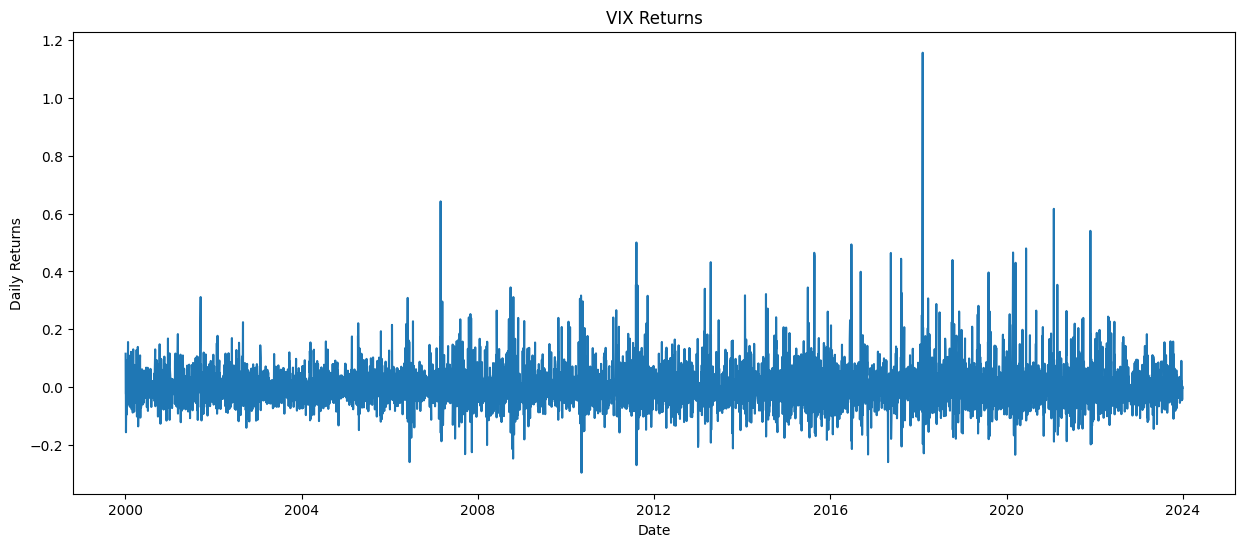

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(vix_data['Returns'])
plt.title('VIX Returns')
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.show()

GARCH:

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2023-12-31')
vix_data = vix_data[['Close']].dropna()
vix_data['Returns'] = vix_data['Close'].pct_change().dropna()

# Rescale returns AFTER dropping NaNs
rescaled_returns = vix_data['Returns'].dropna() * 100  # Drop NaNs before rescaling

# Now create and fit the model
model = arch_model(rescaled_returns, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')
print(garch_fit.summary())

[*********************100%***********************]  1 of 1 completed

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -20227.1
Distribution:                  Normal   AIC:                           40462.1
Method:            Maximum Likelihood   BIC:                           40489.0
                                        No. Observations:                 6036
Date:                Sun, Nov 17 2024   Df Residuals:                     6035
Time:                        23:54:00   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1413  8.353e-02      1.691  9.083e-02 [-2.24

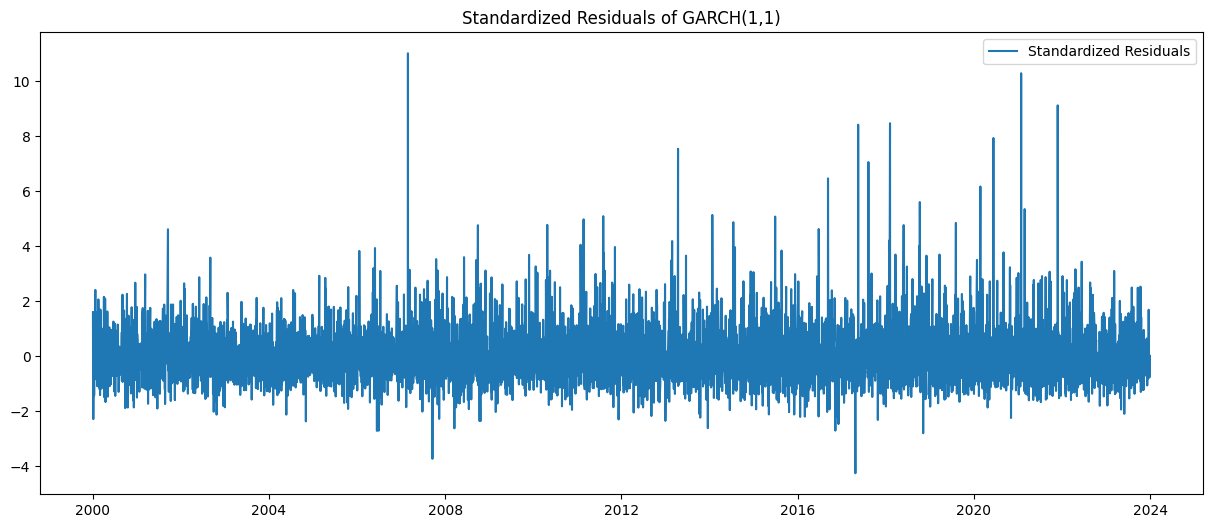

      lb_stat     lb_pvalue
10  49.808764  2.894133e-07


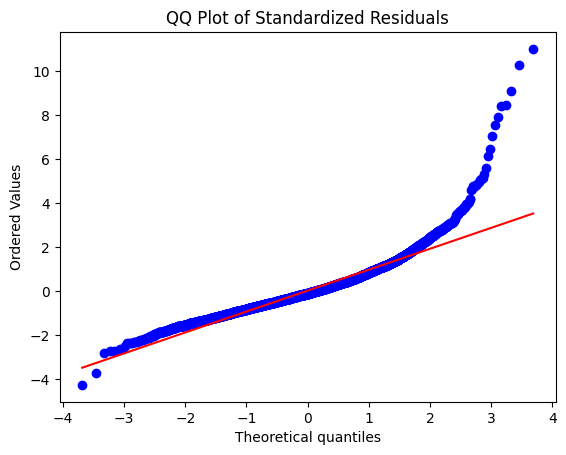

In [30]:
# Plot standardized residuals
plt.figure(figsize=(15, 6))
plt.plot(garch_fit.resid / garch_fit.conditional_volatility, label='Standardized Residuals')
plt.title('Standardized Residuals of GARCH(1,1)')
plt.legend()
plt.show()

# Perform Ljung-Box test on standardized residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(garch_fit.resid / garch_fit.conditional_volatility, lags=[10], return_df=True)
print(ljung_box_results)

# QQ plot of standardized residuals
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(garch_fit.resid / garch_fit.conditional_volatility, dist="norm", plot=plt)
plt.title('QQ Plot of Standardized Residuals')
plt.show()


EGARCH:

In [31]:

import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2023-12-31')
vix_data = vix_data[['Close']].dropna()
vix_data['Returns'] = vix_data['Close'].pct_change().dropna()

# Rescale returns AFTER dropping NaNs
rescaled_returns = vix_data['Returns'].dropna() * 100  # Drop NaNs before rescaling

##example:
#model = arch_model(rescaled_returns, vol='Garch', p=1, q=1)
#garch_fit = model.fit(disp='off')
#print(garch_fit.summary())

# Fit an EGARCH(1,1) model
model = arch_model(rescaled_returns.dropna(), vol='EGARCH', p=1, q=1)
egarch_fit = model.fit(disp='off')
print(egarch_fit.summary())


[*********************100%***********************]  1 of 1 completed


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -20244.4
Distribution:                  Normal   AIC:                           40496.8
Method:            Maximum Likelihood   BIC:                           40523.6
                                        No. Observations:                 6036
Date:                Sun, Nov 17 2024   Df Residuals:                     6035
Time:                        23:54:02   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0659  8.709e-02      0.757      0.449 [ -0.105,  0.23

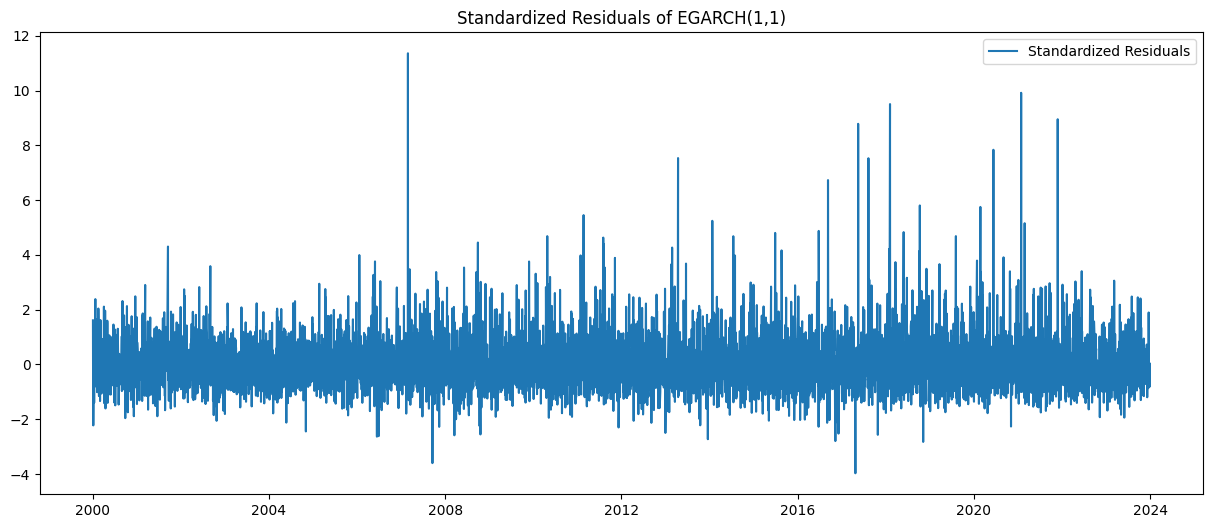

      lb_stat     lb_pvalue
10  52.883641  7.825712e-08


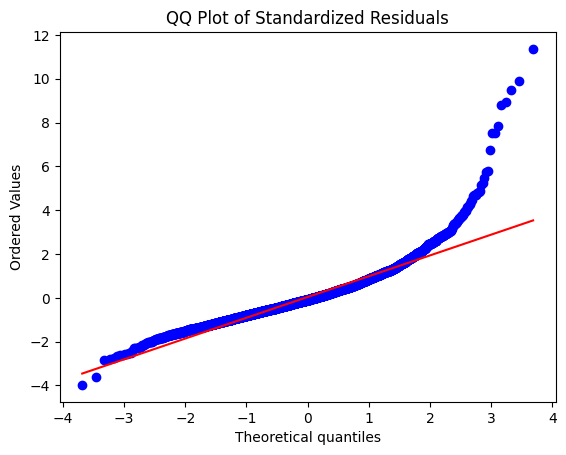

In [32]:
# Plot standardized residuals
plt.figure(figsize=(15, 6))
plt.plot(egarch_fit.resid / egarch_fit.conditional_volatility, label='Standardized Residuals')
plt.title('Standardized Residuals of EGARCH(1,1)')
plt.legend()
plt.show()

# Perform Ljung-Box test on standardized residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(egarch_fit.resid / egarch_fit.conditional_volatility, lags=[10], return_df=True)
print(ljung_box_results)

# QQ plot of standardized residuals
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(egarch_fit.resid / egarch_fit.conditional_volatility, dist="norm", plot=plt)
plt.title('QQ Plot of Standardized Residuals')
plt.show()


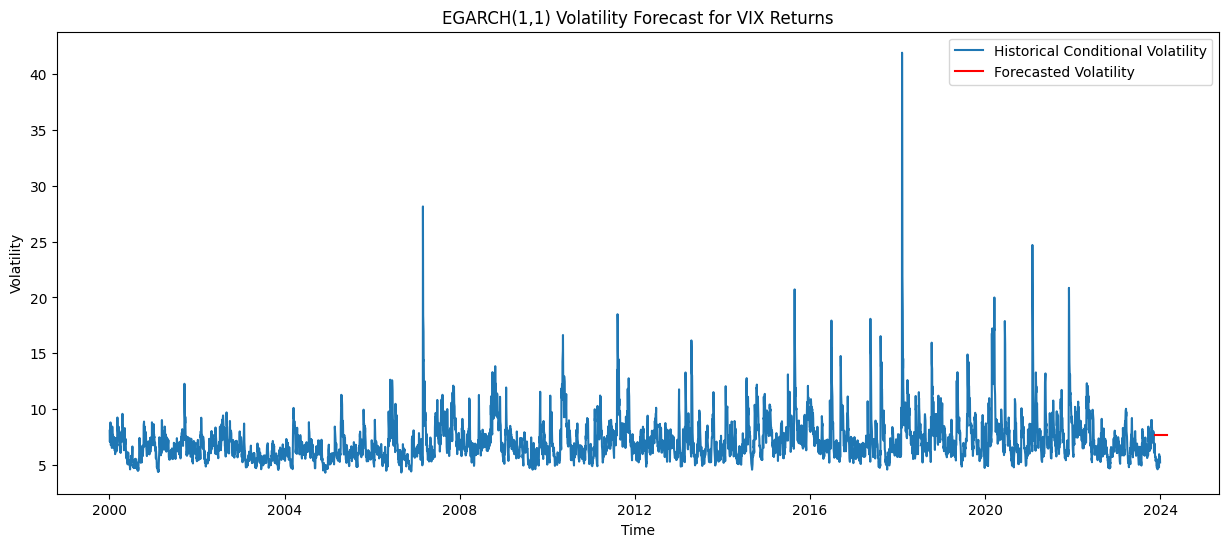

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# ... (your previous code for downloading and fitting the EGARCH model) ...

# Forecast horizon (number of steps to forecast)
forecast_horizon = 70

# Generate the forecast using 'simulation' method
egarch_forecast = egarch_fit.forecast(horizon=forecast_horizon, method='simulation', simulations=1000, reindex=False)

# Create a proper index for the forecasted values
forecast_start_date = vix_data.index[-30]  # Or any other date you choose within vix_data.index
forecast_start = forecast_start_date
forecast_index = pd.date_range(start=forecast_start, periods=forecast_horizon, freq='B')

# Extract forecasted variance
forecasted_variance = egarch_forecast.variance.iloc[0]  # Access the first row (horizon 1)

# Take the mean across simulations for the forecast horizon
forecasted_volatility = np.sqrt(forecasted_variance.mean())

# Align historical volatility with vix_data index that was used for fitting
historical_volatility = egarch_fit.conditional_volatility

# Plot historical and forecasted volatility
plt.figure(figsize=(15, 6))
plt.plot(historical_volatility.index, historical_volatility, label='Historical Conditional Volatility')
plt.plot(forecast_index, [forecasted_volatility] * forecast_horizon, color='red', label='Forecasted Volatility') # Repeat for plotting
plt.title('EGARCH(1,1) Volatility Forecast for VIX Returns')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Log Returns using GARCH(1,1)

In [34]:
import numpy as np

# Calculate log returns for VIX
vix_data['Log_Returns'] = np.log(vix_data['Returns'].abs() + 1e-8)  # Small constant to avoid log(0)


In [35]:
from arch import arch_model

# Fit GARCH(1,1) model on log returns
model = arch_model(vix_data['Log_Returns'].dropna(), vol='Garch', p=1, q=1)
garch_fit_log = model.fit(disp='off')
print(garch_fit_log.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11130.7
Distribution:                  Normal   AIC:                           22269.4
Method:            Maximum Likelihood   BIC:                           22296.2
                                        No. Observations:                 6036
Date:                Sun, Nov 17 2024   Df Residuals:                     6035
Time:                        23:54:06   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -3.5320  2.086e-02   -169.317      0.000 [ -3.573, -3.49

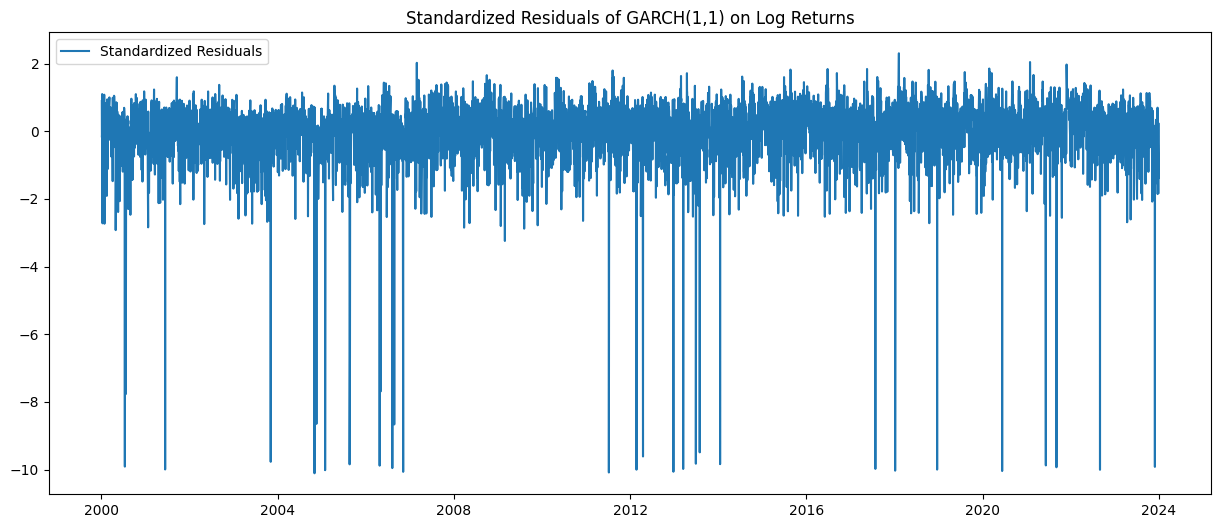

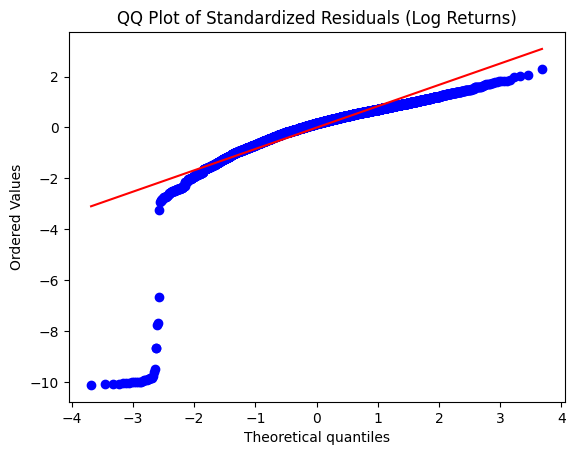

In [36]:
# Plot standardized residuals
plt.figure(figsize=(15, 6))
plt.plot(garch_fit_log.resid / garch_fit_log.conditional_volatility, label='Standardized Residuals')
plt.title('Standardized Residuals of GARCH(1,1) on Log Returns')
plt.legend()
plt.show()

# QQ plot of standardized residuals
import scipy.stats as stats
stats.probplot(garch_fit_log.resid / garch_fit_log.conditional_volatility, dist="norm", plot=plt)
plt.title('QQ Plot of Standardized Residuals (Log Returns)')
plt.show()


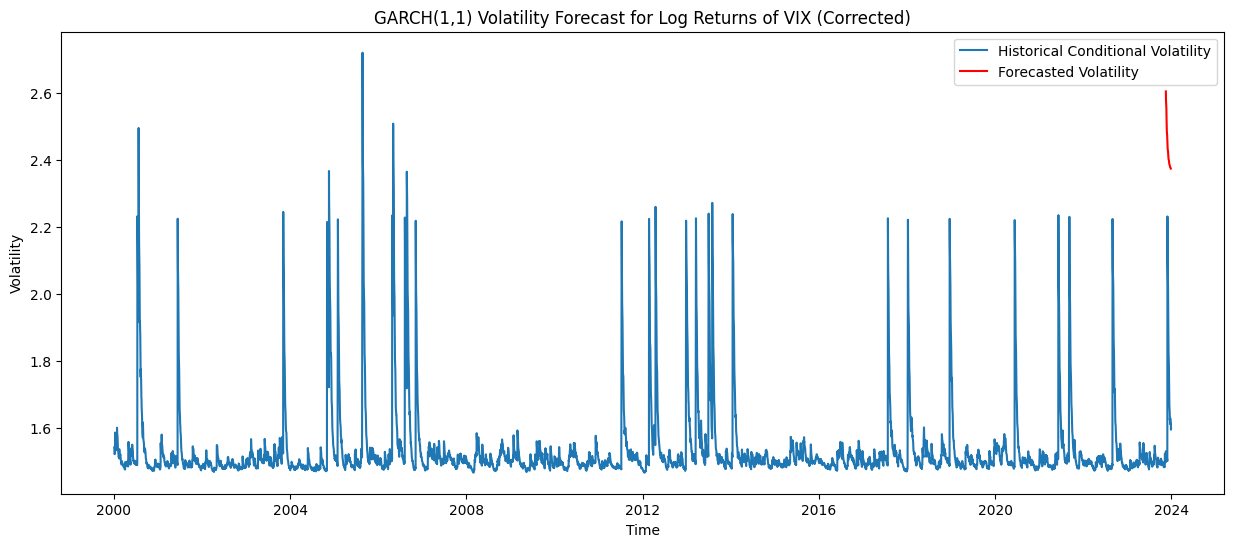

In [37]:
import pandas as pd
from arch import arch_model

# Generate the forecast
garch_forecast_log = garch_fit_log.forecast(horizon=forecast_horizon, reindex=False)
# Create a proper index for the forecasted values
forecast_horizon = 30  # Number of days to forecast
forecast_start_date = vix_data.index[-30] # Or any other date you choose within vix_data.index
forecast_start = forecast_start_date
forecast_index = pd.date_range(start=forecast_start, periods=forecast_horizon, freq='B')
# Extract forecasted variance
forecasted_volatility = garch_forecast_log.variance.values[-1, :]  # Extract last forecast horizon

# Align historical volatility with vix_data index that was used for fitting
historical_volatility = garch_fit_log.conditional_volatility

# Plot corrected historical and forecasted volatility
plt.figure(figsize=(15, 6))

# Use the index of the fitted data for plotting historical volatility
plt.plot(historical_volatility.index, historical_volatility, label='Historical Conditional Volatility')
plt.plot(forecast_index, forecasted_volatility, color='red', label='Forecasted Volatility')
plt.title('GARCH(1,1) Volatility Forecast for Log Returns of VIX (Corrected)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()